In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -d -v

Sebastian Raschka 10/12/2015 

CPython 3.5.0
IPython 4.0.0


In [2]:
import sys
import os
sys.path = [os.path.abspath('../../../')] + sys.path

## Sections
- [Introduction to Sequential Backward Selection](#Introduction-to-Sequential-Backward-Selection)
    - [Further Reading](#Further-Reading)
- [Iris Example](#Iris-Example)
- [Wine Data Example](#Wine-Data-Example)
- [Gridsearch Example 1](#Gridsearch-Example-1)
- [Gridsearch Example 2](#Gridsearch-Example-2)

# Introduction to Sequential Backward Selection

In order to avoid the Curse of Dimensionality, pattern classification is often accompanied by Dimensionality Reduction, which also has the nice side-effect of increasing the computational performance. Common techniques are projection-based, such as Principal Component Analysis (PCA) (unsupervised) or Linear Discriminant (LDA) (supervised). It shall be noted though that regularization in classification models such as Logistic Regression, Support Vector Machines, or Neural Networks is to be preferred over using dimensionality reduction to avoid overfitting. However, dimensionality reduction is still a useful data compression technique to increase computational efficiency and data storage problems.

An alternative to a projection-based dimensionality reduction approach is the so-called Feature Selection, and here, we will take a look at some of the established algorithms to tackle this combinatorial search problem: Sequential Backward Selection (SBS). 

Let's summarize its mechanics in words:
SBS starts with the original $d$-dimensional feature set and sequentially removes features from this set until the subset reaches a desired (user-specified) size $k$ where $k < d$. In every iteration $i$, the subset $d-i$ dimensional subset is evaluated using a criterion function to determine the least informative feature to be removed.

The criterion function is typically the performance of the classifier measured via cross validation. 

Let's consider the following example where we have a dataset that consists of 3 features:


- Original feature set: $\{x_1, x_2, x_3\}$

In order to determine the least informative feature, we create 2-dimensional feature subsets and measure the performance (e.g., accuracy) of the classifier on each of those subset:

- 1: $\{x_1, x_2\}$ -> 0.96
- 2: $\{x_1, x_3\}$ -> 0.87
- 3: $\{x_2, x_3\}$ -> 0.77

Based on the accuracy measures, we would then eliminate feature $x_3$ and repeat this procedure until we reached the number of features to select. E.g., if we'd want to select 2 features, we'd stop at this point and select the feature subset $\{x_1, x_2$\}.

Note that this algorithm is considered as "subpoptimal" in contrast to an exhaustive search, which is often computationally not feasible, though.

## Further Reading

[[back to top](#Sections)]

F. Ferri, P. Pudil, M. Hatef, and J. Kittler investigated the performance of different Sequential Selection Algorithms for Feature Selection on different scales and reported their results in

- ["Comparative Study of Techniques for Large Scale Feature Selection,"](https://books.google.com/books?id=sbajBQAAQBAJ&pg=PA403&lpg=PA403&dq=Comparative+Study+of+Techniques+for+Large+Scale+Feature+Selection&source=bl&ots=KdGKWqzbzj&sig=5I9nhy-TrRmKyAiLDfy5ML_m578&hl=en&sa=X&ei=i7w-VYnoPMyXsAWm2IGgCw&ved=0CD4Q6AEwBA#v=onepage&q=Comparative%20Study%20of%20Techniques%20for%20Large%20Scale%20Feature%20Selection&f=false) Pattern Recognition in Practice IV, E. Gelsema and L. Kanal, eds., pp. 403-413. Elsevier Science B.V., 1994.

Choosing an "appropriate" algorithm really depends on the problem - the size and desired recognition rate and computational performance. Thus, I want to encourage you to take (at least) a brief look at their paper and the results they obtained from experimenting with different problems feature space dimensions.

<br>
<br>

# Iris Example

[[back to top](#Sections)]

In [9]:
# suppress Python 3.5 related deprecation warning with scikit-learn 

import warnings
warnings.filterwarnings('ignore')

In [10]:
from mlxtend.feature_selection import SBS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=4)

sbs = SBS(knn, k_features=2, scoring='accuracy', cv=5)
sbs.fit(X, y)

print('Indices of selected features:', sbs.indices_)
print('CV score of selected subset:', sbs.k_score_)
print('New feature subset:')
sbs.transform(X)[0:5]

Indices of selected features: (0, 3)
CV score of selected subset: 0.96
New feature subset:


array([[ 5.1,  0.2],
       [ 4.9,  0.2],
       [ 4.7,  0.2],
       [ 4.6,  0.2],
       [ 5. ,  0.2]])

<br>
<br>

# Wine Data Example

[[back to top](#Sections)]

In [11]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


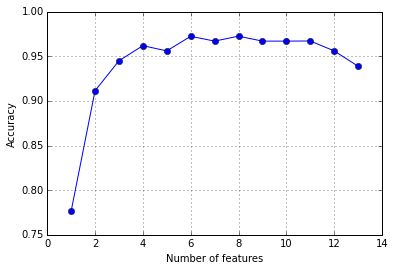

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scr = StandardScaler()
X_std = scr.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=4)

# selecting features
sbs = SBS(knn, k_features=1, scoring='accuracy', cv=5)
sbs.fit(X_std, y)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

<br>
<br>

# Gridsearch Example 1

[[back to top](#Sections)]

Selecting the number of features in a pipeline.

In [13]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from mlxtend.feature_selection import SBS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

##########################
### Loading data
##########################

iris = load_iris()
X = iris.data
y = iris.target

##########################
### Setting up pipeline
##########################
knn = KNeighborsClassifier(n_neighbors=4)

sbs = SBS(estimator=knn, k_features=2, scoring='accuracy', cv=5)

pipeline = Pipeline([
            ('scr', StandardScaler()), 
            ('sel', sbs),
            ('clf', knn)])

parameters = {'sel__k_features': [1,2,3,4]}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1, verbose=1)

##########################
### Running GridSearch
##########################
grid_search.fit(X, y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.8s finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best score: 0.960
Best parameters set:
	sel__k_features: 1


<br>
<br>

# Gridsearch Example 2

[[back to top](#Sections)]

Tuning the estimator used for feature selection. Note that the current implementation requires to search for the weights in both the classifier and the SBS transformer separately.

In [15]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from mlxtend.feature_selection import SBS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

##########################
### Loading data
##########################

iris = load_iris()
X = iris.data
y = iris.target

##########################
### Setting up pipeline
##########################
knn = KNeighborsClassifier(n_neighbors=4)

sbs = SBS(estimator=knn, k_features=2, scoring='accuracy', cv=5)

pipeline = Pipeline([
            ('scr', StandardScaler()), 
            ('sel', sbs),
            ('clf', knn)])

parameters = {'sel__k_features': [1, 2, 3, 4],
              'sel__estimator__n_neighbors': [4, 5, 6],
              'clf__n_neighbors': [4, 5, 6]}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=1, verbose=1)

##########################
### Running GridSearch
##########################
grid_search.fit(X, y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:    3.6s


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score: 0.973
Best parameters set:
	clf__n_neighbors: 5
	sel__estimator__n_neighbors: 5
	sel__k_features: 2


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    8.0s finished


The final feature subset can then be obtained as follows:

In [16]:
print('Best feature subset:')
grid_search.best_estimator_.steps[1][1].indices_

Best feature subset:


(2, 3)